**感謝教科書與網路上程式教學**


https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

指標對照表與活動建議

https://www.ntepb.gov.tw/sub/content/index.aspx?Parser=1,17,511,494,496

BUG 寫程式改進

2023-02-2
1. 資料集 首先要資料清理 找到異常 資料型態不合 如 物件型態 有 文字"-" 清理 等處
理
1. 用OHT-HOT 作用 整個資料 文件分類屬性
2. 乾淨資料再進行探索
3. 探索完 在分割


# 常使用的功能函式
* 儲存圖片
* 下載資料
* 資料清理(填補缺失/清理異常)
* 修改大量圖片檔名


In [1]:
import numpy as np
import os


# to ploy pretty figures
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=30) #matplotlib使用matplotlibrc組態檔案來自定義各種屬性，我們稱之為rc設定或rc引數
mpl.rc('xtick', labelsize=100)
mpl.rc('ytick', labelsize=100)
# print(plt.style.available)
plt.style.use(['seaborn-dark', 'seaborn-notebook' ])

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_figure(fig_id, tight_layout=True, fig_extension="png", resolution=600):
  '''以圖片ID 儲存成png dpi品質600 圖片'''
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension) #圖片存放地址
  print("Saving figure", fig_id)
  if tight_layout:
      plt.tight_layout()
  plt.style.use(['seaborn-dark', 'seaborn-notebook' ])
  plt.savefig(path, format=fig_extension, dpi=resolution)


C:\Users\user\AppData\Local\Temp\ipykernel_3332\3756262967.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-dark', 'seaborn-notebook' ])
C:\Users\user\AppData\Local\Temp\ipykernel_3332\3756262967.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-dark', 'seaborn-notebook' ])


# 下載檔案

In [2]:
import os
import tarfile #解壓縮檔案
import urllib.request


# 方便快速下載資料

FILE_PATH = os.path.join("datasets", "pm2_5")
FILE_URL = 'https://data.epa.gov.tw/api/v2/aqx_p_432?api_key=e8dd42e6-9b8b-43f8-991e-b3dee723a52d&limit=1000&sort=ImportDate%20desc&format=CSV'
FILE_NAME = "pm2_5.csv"
def fetch_title_data(url=FILE_URL, path=FILE_PATH, fname=FILE_NAME):
    '''下載Web 上公開資料, 如果tgz 壓縮檔，則解壓縮'''
    if not os.path.exists(path): #如果不存在，就創建資料夾
        os.makedirs(path)

    
    tgz_path = os.path.join(path, FILE_NAME) #下載地址與檔名
    urllib.request.urlretrieve(url, tgz_path)

    if not FILE_NAME.split('.')[-1] == 'csv': #如果是壓縮檔，就解壓縮

      housing_tgz = tarfile.open(tgz_path) #開啟
      housing_tgz.extractall(path=path) #解壓縮
      housing_tgz.close()


# import zipfile

# # 開啟 ZIP 壓縮檔
# with zipfile.ZipFile('/content/drive/MyDrive/HW4-speack_classify_Dataset.zip', 'r') as zf:
#     # 列出每個檔案
#     for name in zf.namelist():
#         # 解壓縮指定檔案至 /my/folder 目錄
#         zf.extract(name, path='/content/folder')


In [3]:
fetch_title_data(FILE_URL, FILE_PATH, FILE_NAME)

# 讀取文件回傳DataFrame

In [4]:
import pandas as pd

def load_title_data(path=FILE_PATH):
    '''載入檔案 回傳DataFrame'''
    csv_path = os.path.join(path, FILE_NAME)
    return pd.read_csv(csv_path)

In [5]:
pm25_full = load_title_data()

pm25_full.head()

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,基隆,基隆市,58,臭氧八小時,普通,0.6,0.30,49.0,57.5,27,...,0.2,336,2023/05/09 22:00:00,0.2,17,33,0,121.760056,25.129167,1
1,汐止,新北市,53,細懸浮微粒,普通,1.1,0.28,31.2,47.6,36,...,0.3,24,2023/05/09 22:00:00,0.2,16,37,0,121.640810,25.066240,2
2,萬里,新北市,84,臭氧八小時,普通,0.5,0.16,69.3,65.8,59,...,4.2,50,2023/05/09 22:00:00,0.1,15,66,0,121.689881,25.179667,3
3,新店,新北市,46,NaN,良好,0.4,0.24,51.8,50.4,27,...,1.8,137,2023/05/09 22:00:00,0.2,14,35,0,121.537778,24.977222,4
4,土城,新北市,52,細懸浮微粒,普通,1.9,0.28,47.8,50.8,30,...,1.4,338,2023/05/09 22:00:00,0.2,15,36,1,121.451861,24.982528,5


In [6]:
pm25_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sitename     85 non-null     object 
 1   county       85 non-null     object 
 2   aqi          85 non-null     int64  
 3   pollutant    64 non-null     object 
 4   status       85 non-null     object 
 5   so2          84 non-null     float64
 6   co           85 non-null     float64
 7   o3           85 non-null     float64
 8   o3_8hr       84 non-null     float64
 9   pm10         85 non-null     int64  
 10  pm2.5        85 non-null     int64  
 11  no2          84 non-null     float64
 12  nox          84 non-null     float64
 13  no           84 non-null     float64
 14  wind_speed   82 non-null     object 
 15  wind_direc   83 non-null     object 
 16  publishtime  85 non-null     object 
 17  co_8hr       85 non-null     float64
 18  pm2.5_avg    85 non-null     int64  
 19  pm10_avg  

# Matplotlib 資料視覺化尋找關聯性
* 折線圖
* 圓餅圖
* 直方圖
* 長條圖
* 箱型圖

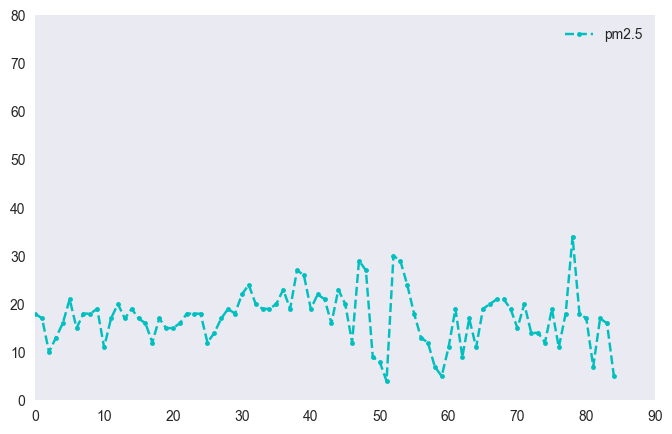

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(pm25_full['pm2.5'], 'c--.', label='pm2.5')
plt.legend(loc=1)
plt.axis([0,90,0,80])

plt.show()


[11 10  9  6  5  5  4  4  4  3  2  2  2  2  2  2  2  2  2  1  1  1  1  1
  1]
Int64Index([19, 18, 17, 20, 16, 12, 21, 15, 11, 14, 27,  5,  7,  9, 29, 22, 23,
            24, 13, 26,  8,  4, 30, 10, 34],
           dtype='int64')
pm2.5_cat分類標籤頻率 2    59
3    16
1     9
4     1
5     0
Name: pm2.5_cat, dtype: int64


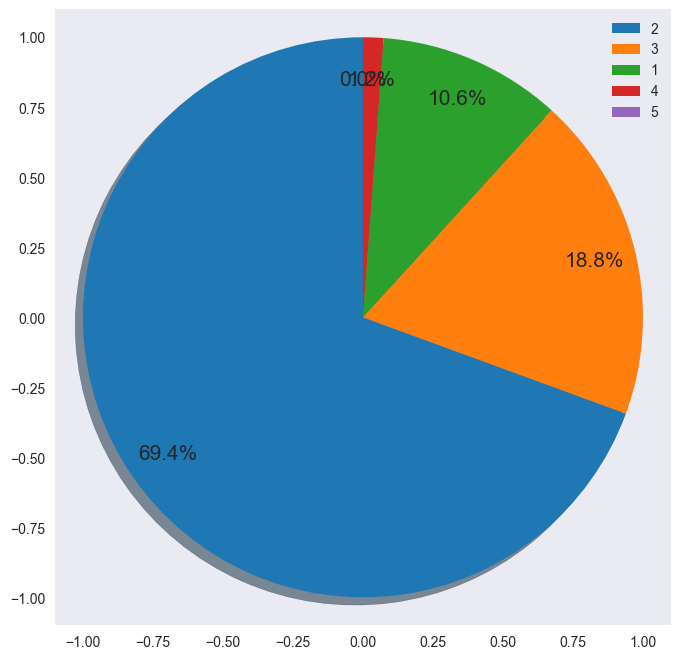

In [8]:
import matplotlib.pyplot as plt

print(pm25_full['pm2.5'].value_counts().values)
print(pm25_full['pm2.5'].value_counts().index)



pm25_full['pm2.5_cat'] = pd.cut(pm25_full['pm2.5'], bins= [0, 10, 20, 30, 40, np.inf], labels = ['1','2', '3' , '4', '5'])  #迅速將數值資料分組 並貼上標籤
print("pm2.5_cat分類標籤頻率",pm25_full['pm2.5_cat'].value_counts())  # 2 3 1 4 5

data = pm25_full['pm2.5'].value_counts().values
# labels = pm25_full['pm2.5'].value_counts().index

labels = pm25_full['pm2.5_cat'].value_counts().index #['2','3', '1' ,'4', '5']


explode = []

plt.figure(figsize=(10,8))
plt.pie(pm25_full['pm2.5_cat'].value_counts(), autopct='%.1f%%', pctdistance=0.85, shadow=True, startangle= 90, frame=True, textprops={'fontsize':15})
plt.legend(labels,loc=1, fontsize= 10)
# plt.axis([0,100,0,50])

plt.show()

2    59
3    16
1     9
4     1
5     0
Name: pm2.5_cat, dtype: int64


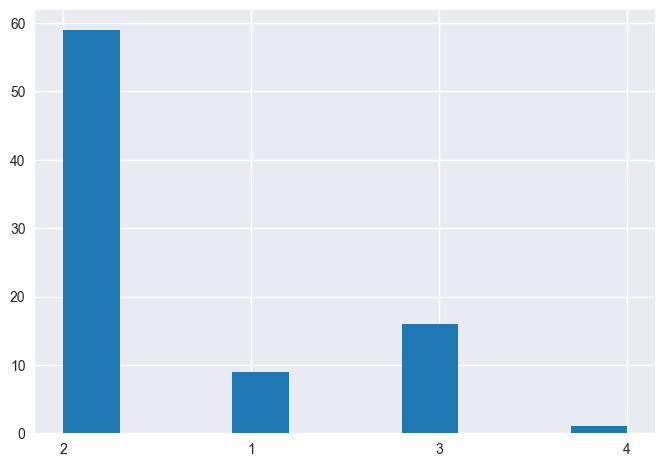

c:\Users\user\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\matplotlib\axes\_axes.py:6743: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


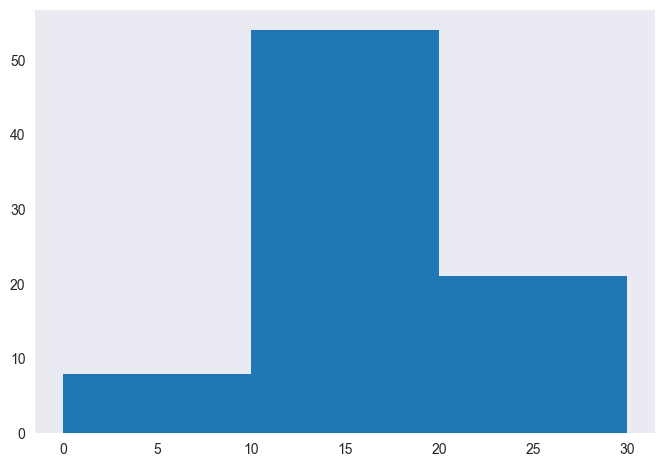

In [9]:
print(pm25_full['pm2.5_cat'].value_counts())
pm25_full['pm2.5_cat'].hist()
plt.show()
plt.hist( pm25_full['pm2.5'], 
              bins=[0,  10,  20, 30,  np.inf], 
              )
plt.show()

RangeIndex(start=0, stop=85, step=1) [18 17 10 13 16 21 15 18 18 19 11 17 20 17 19 17 16 12 17 15 15 16 18 18
 18 12 14 17 19 18 22 24 20 19 19 20 23 19 27 26 19 22 21 16 23 20 12 29
 27  9  8  4 30 29 24 18 13 12  7  5 11 19  9 17 11 19 20 21 21 19 15 20
 14 14 12 19 11 18 34 18 17  7 17 16  5]


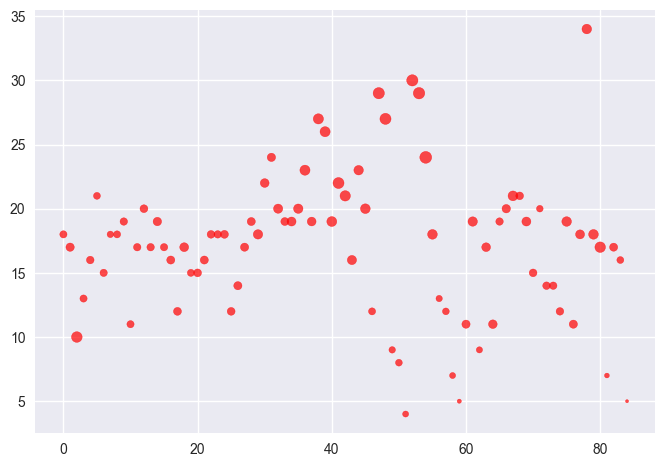

In [10]:

x = pm25_full['pm2.5'].index   #range(len(pm25_full['pm2.5'].values))
data = pm25_full['pm2.5'].values
print(x, data)
plt.scatter(x, data, s= pm25_full['pm10'], alpha=0.7, c='r'
          )
plt.grid()
plt.show()

CategoricalIndex(['2', '3', '1', '4', '5'], categories=['1', '2', '3', '4', '5'], ordered=True, dtype='category') [59 16  9  1  0]


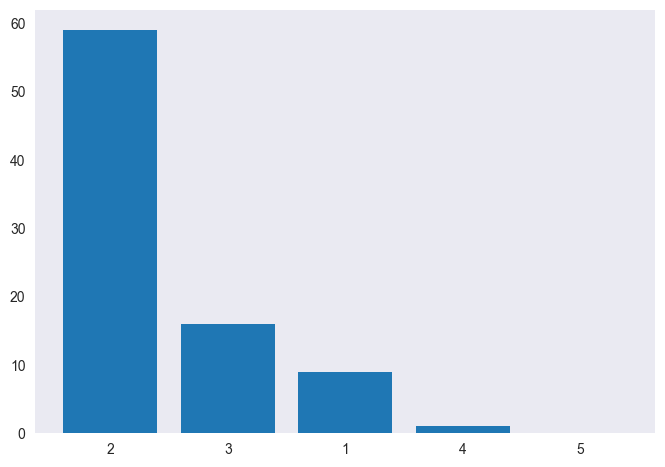

In [11]:
labels = pm25_full['pm2.5_cat'].value_counts().index
data = pm25_full['pm2.5_cat'].value_counts().values
print(labels, data)

plt.bar(labels, height=data)
plt.show()

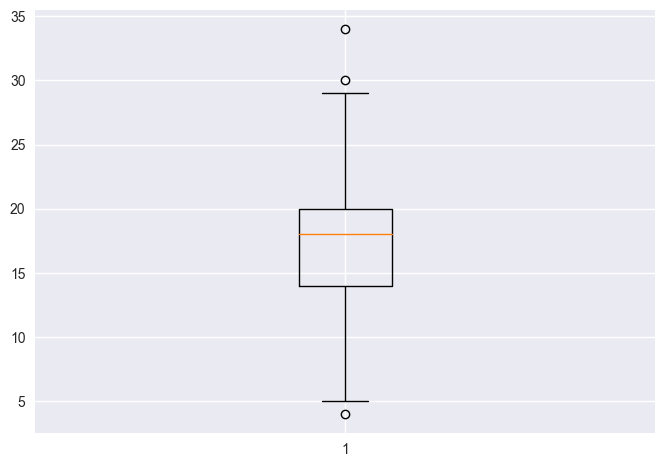

In [12]:


plt.boxplot(pm25_full['pm2.5'])
plt.grid()
plt.show()

<AxesSubplot: >

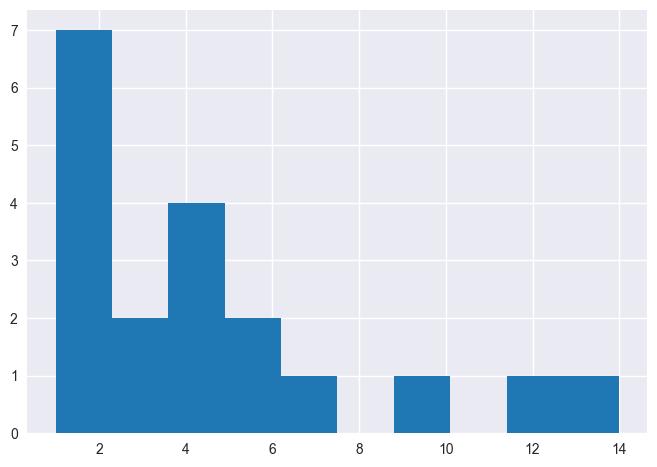

In [13]:
pm25_full["pm2.5_avg"].value_counts().hist()

In [14]:
pm25_full["county"].value_counts()

新北市    13
高雄市    13
臺北市     7
桃園市     7
彰化縣     5
屏東縣     5
臺中市     5
臺南市     5
雲林縣     4
苗栗縣     3
南投縣     3
嘉義縣     2
宜蘭縣     2
新竹縣     2
臺東縣     2
連江縣     1
金門縣     1
基隆市     1
花蓮縣     1
嘉義市     1
新竹市     1
澎湖縣     1
Name: county, dtype: int64

In [15]:
pm25_full.describe()

,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
count,85.000000,84.000000,85.000000,85.000000,84.000000,85.000000,85.000000,84.000000,84.000000,84.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,57.211765,1.261905,0.279059,43.911765,48.060714,36.882353,17.200000,10.334524,11.516667,1.154762,0.241176,16.447059,37.752941,0.682353,120.825199,24.033080,57.400000
std,12.754172,0.805688,0.127285,10.453393,9.208299,13.614953,5.648008,5.840067,7.963090,2.975013,0.127517,4.332892,11.198327,0.727222,0.604438,1.003987,63.991108
min,31.000000,0.000000,0.080000,22.900000,22.100000,5.000000,4.000000,0.600000,0.800000,0.000000,0.000000,4.000000,6.000000,0.000000,118.312256,21.958069,1.000000
25%,52.000000,0.700000,0.210000,37.500000,41.625000,28.000000,14.000000,6.375000,7.550000,0.400000,0.200000,15.000000,32.000000,0.000000,120.345531,23.048197,22.000000
50%,58.000000,1.150000,0.250000,43.800000,48.350000,34.000000,18.000000,9.450000,10.300000,0.700000,0.200000,17.000000,38.000000,1.000000,120.685306,24.131672,43.000000
75%,63.000000,1.600000,0.330000,50.800000,53.925000,46.000000,20.000000,13.800000,14.350000,0.925000,0.300000,19.000000,43.000000,1.000000,121.432500,25.001327,65.000000
max,112.000000,4.300000,1.140000,71.700000,74.700000,73.000000,34.000000,36.000000,62.300000,26.300000,1.000000,24.000000,66.000000,2.000000,121.792928,26.151884,313.000000


Saving figure attribute_histogram_plots


C:\Users\user\AppData\Local\Temp\ipykernel_3332\3756262967.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-dark', 'seaborn-notebook' ])
C:\Users\user\AppData\Local\Temp\ipykernel_3332\3756262967.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-dark', 'seaborn-notebook' ])


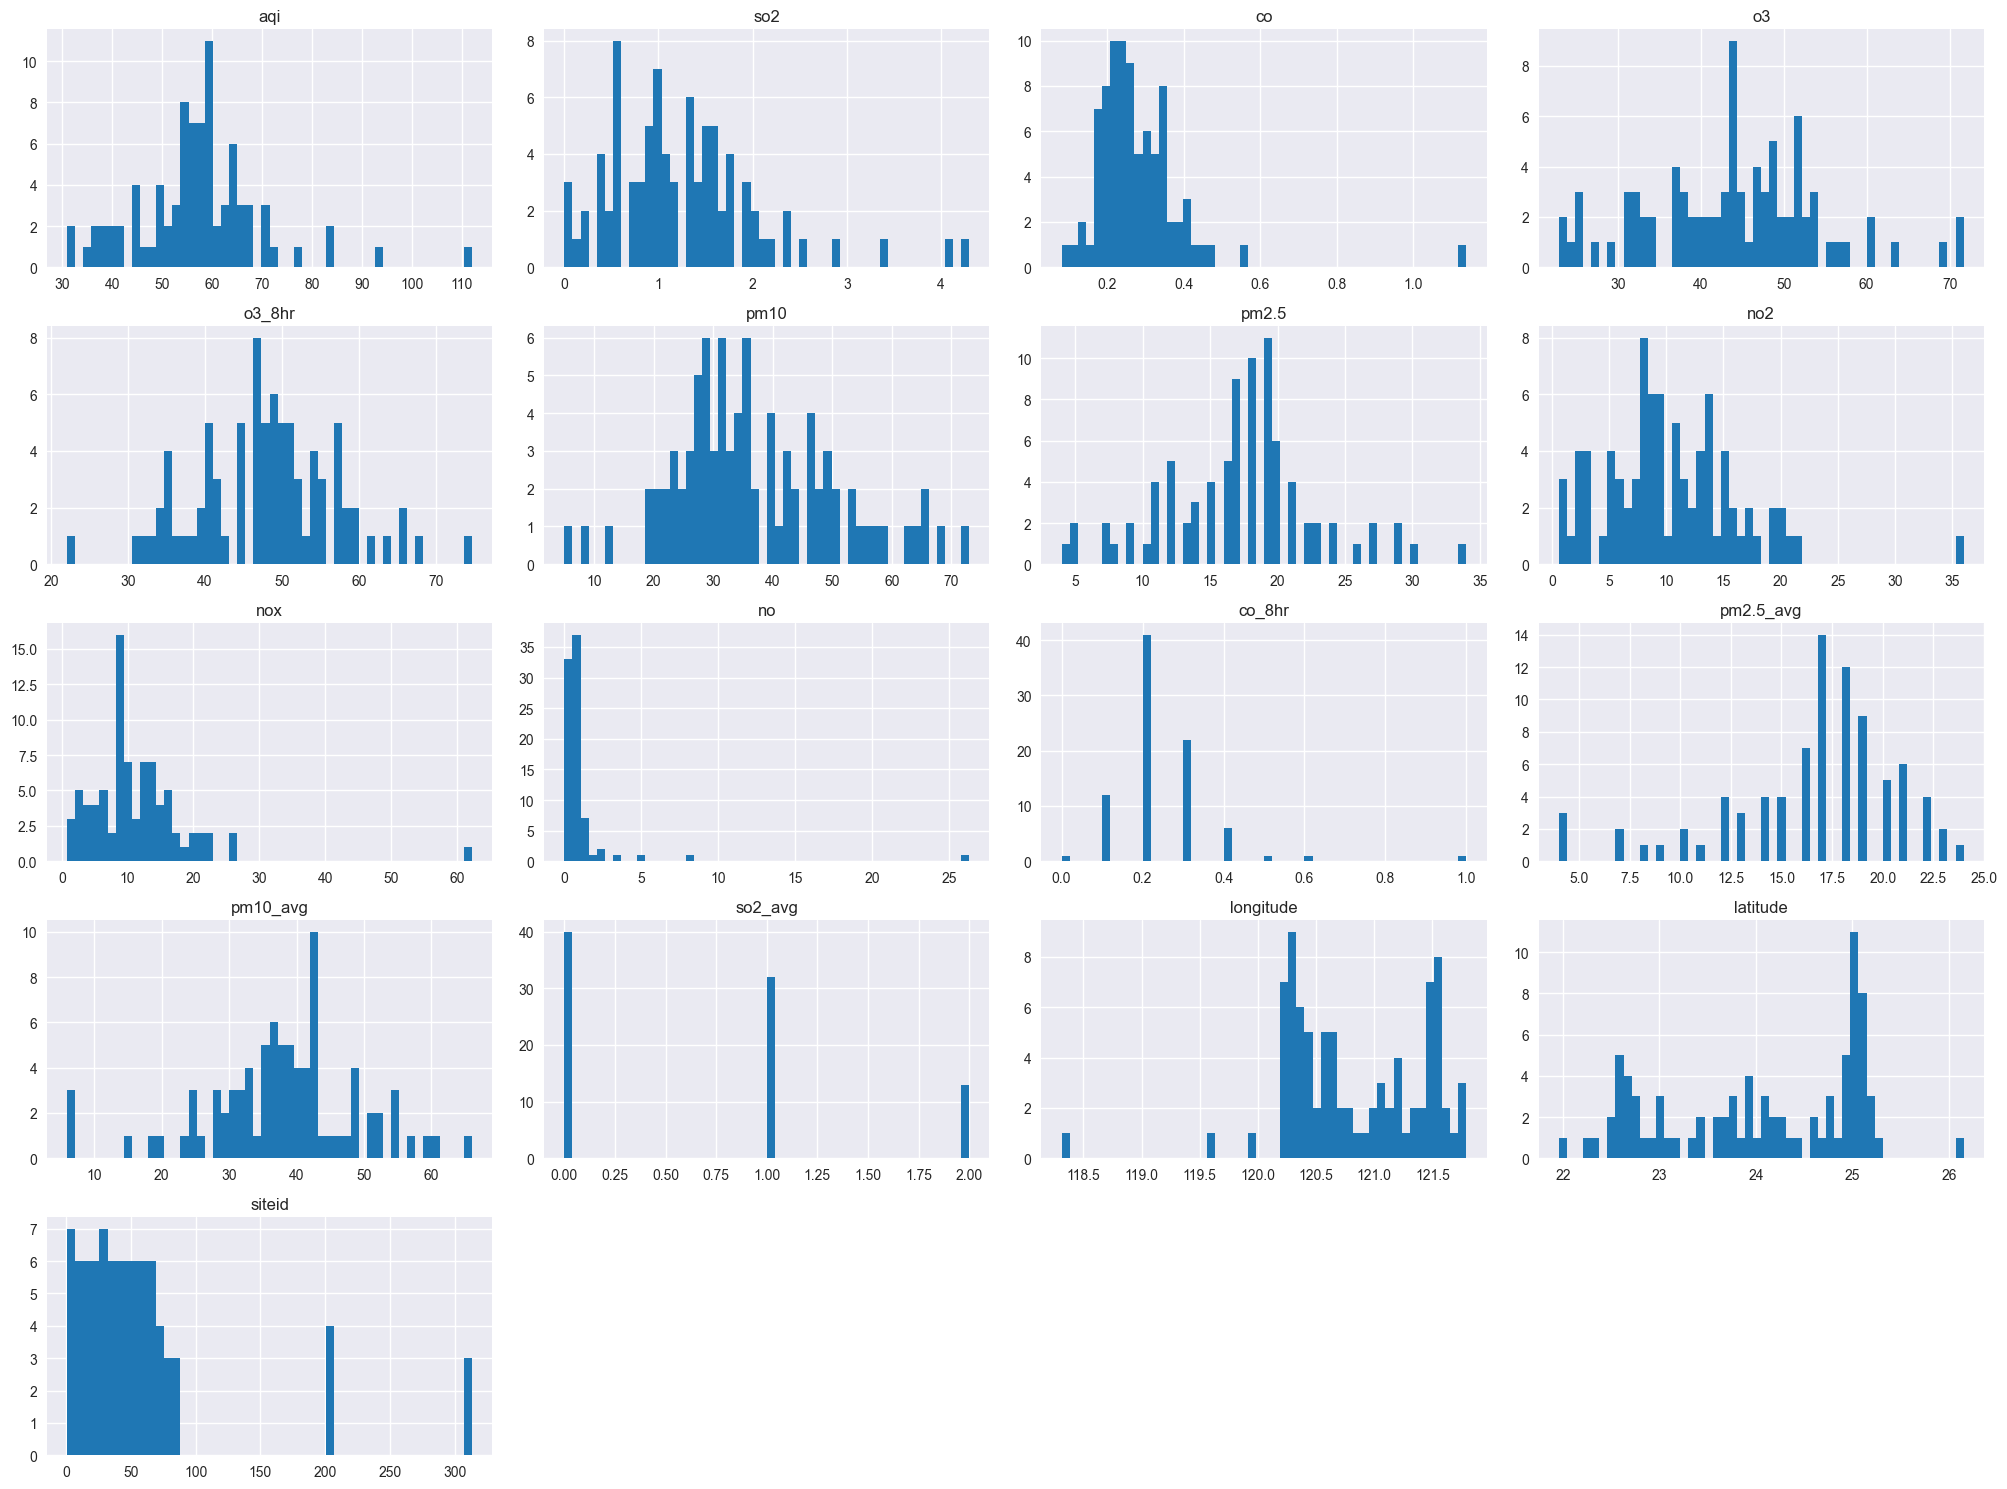

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
pm25_full.hist(bins=50, figsize=(20,15))
save_figure("attribute_histogram_plots")
plt.show()

In [17]:
# import torch
# import numpy as np


# X = np.zeros( (0,3,128,128) , dtype=np.float32)
# print(type(X), X.dtype)
# print(X.shape)
# B = np.full( (5,3,128,128), np.random.randint(1,10))
# print(B[2].reshape(-1,3,128,128).shape) #新增一個維度

# X = np.vstack( (X, [B[2]] ))



# print(X.shape)
# a = torch.rand((100,3,128,128))
# b = a.numpy().copy()
# print(type(a),type(b))
# b *= 10
# print(a,b.shape)


## 建立測試集Create test set

In [18]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [19]:
import numpy as np

# For illustration only. Sklearn has train_test_split()

def split_train_test(data, test_ratio):
  '''For pandas DataFrame split to get train test set
    It's not perfect! the ML will see all data!
    solution 1: np.random.seed(42)\
    solution 2: 分割好把測試組儲存，後續執行再載入
    
    但二種方法當你下次取得更新過後的資料組會失效，為了取得穩定訓練和測試組，
    常見作法使用各個實例的識別碼來決定是否放入測試組(假如實例有唯一不可變的識別碼 如 主鍵)
    solution 3:計算各個實例的雜湊，並且在雜湊小於等於最大雜湊值20%，將那個實例放入測試組'''

  shuffle_indices = np.random.permutation(len(data)) #取出洗亂的索引
  test_set_size = int( len(data) * test_ratio ) #測試集 數量
  test_indices = shuffle_indices[:test_set_size] #測試集索引
  train_indices = shuffle_indices[test_set_size: ] #訓練索引
  return data.iloc[train_indices], data.iloc[test_indices]



In [20]:
trainset, testset = split_train_test(pm25_full, 0.2)
len(trainset)

68

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:


In [21]:

import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [22]:
# from zlib import crc32

# def test_set_check(identifier, test_ratio):
#   '''計算crc32檔案或資料的識別碼，檢查雜湊,雜湊小於等於最大雜湊值20% '''
#   return crc32(np.int64( identifier)) & 0xffffffff < tset_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply( lambda id_ : test_set_check(id_, test_ratio) )
  return data.loc[~in_test_set], data.loc[in_test_set]


In [23]:
pm25_full_with_id = pm25_full.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(pm25_full_with_id, 0.2, "index")
len(train_set)

70

In [24]:
pm25_full_with_id["id"] = pm25_full["longitude"] * 1000 + pm25_full["latitude"] #使用不會變動且唯一 的緯度經度計算成ID
train_set, test_set = split_train_test_by_id(pm25_full_with_id, 0.2, "id")
len(train_set)

65

In [25]:
test_set.head()

,index,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,...,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,pm2.5_cat,id
2,2,萬里,新北市,84,臭氧八小時,普通,0.5,0.16,69.3,65.8,...,2023/05/09 22:00:00,0.1,15,66,0,121.689881,25.179667,3,1,121715.060667
8,8,林口,新北市,56,細懸浮微粒,普通,1.1,0.20,54.0,51.1,...,2023/05/09 22:00:00,0.2,17,33,0,121.365490,25.077989,9,2,121390.567809
12,12,萬華,臺北市,59,細懸浮微粒,普通,1.0,0.35,41.8,44.8,...,2023/05/09 22:00:00,0.3,18,35,0,121.507972,25.046503,13,2,121533.018503
15,15,大同,臺北市,60,細懸浮微粒,普通,1.1,0.37,39.4,35.1,...,2023/05/09 22:00:00,0.4,19,40,0,121.513421,25.063315,16,2,121538.484055
17,17,大園,桃園市,49,NaN,良好,2.4,0.21,48.3,49.5,...,2023/05/09 22:00:00,0.1,15,38,1,121.202515,25.061004,18,2,121227.575734


In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(pm25_full, test_size=0.2, random_state=42)

In [27]:
test_set.head()

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,pm2.5_cat
78,彰化(員林),彰化縣,67,細懸浮微粒,普通,2.0,0.33,25.5,40.7,48,...,323,2023/05/09 22:00:00,0.3,22,44,1,120.563730,23.961170,201,4
0,基隆,基隆市,58,臭氧八小時,普通,0.6,0.30,49.0,57.5,27,...,336,2023/05/09 22:00:00,0.2,17,33,0,121.760056,25.129167,1,2
68,永和,新北市,58,細懸浮微粒,普通,0.4,0.37,48.6,48.9,31,...,96,2023/05/09 22:00:00,0.3,18,36,0,121.516306,25.017000,70,3
22,竹東,新竹縣,53,細懸浮微粒,普通,0.5,0.18,49.2,49.3,31,...,90,2023/05/09 22:00:00,0.1,16,34,0,121.088955,24.740914,23,2
12,萬華,臺北市,59,細懸浮微粒,普通,1.0,0.35,41.8,44.8,32,...,85,2023/05/09 22:00:00,0.3,18,35,0,121.507972,25.046503,13,2


<AxesSubplot: >

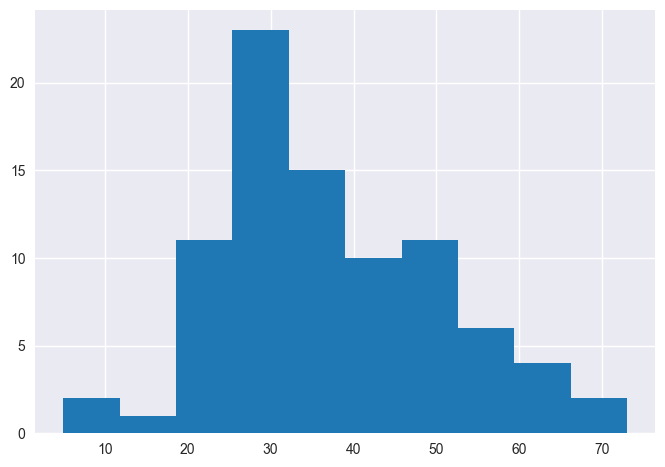

In [28]:
pm25_full['pm10'].hist() #假設pm10 是預測pm2.5 的重要屬性

In [29]:
pm25_full['pm10'].value_counts()

29    6
34    4
35    4
27    3
49    3
42    3
40    3
31    3
33    3
46    3
30    3
26    3
32    3
37    2
19    2
24    2
66    2
48    2
53    2
36    2
44    2
25    2
28    2
22    2
21    1
23    1
50    1
39    1
12    1
20    1
58    1
9     1
54    1
73    1
68    1
64    1
47    1
56    1
63    1
51    1
41    1
59    1
5     1
Name: pm10, dtype: int64

In [30]:
pm25_full['pm10'].isnull().sum() #缺失值


0

In [31]:
pm25_full['pm10'].median() #假設pm10 pm25_full


34.0

In [32]:
# 填補缺失 用median 修復 分割資料集遇到的錯誤，如 遇到NAN or 太大 超出 float範圍
pm25_full['pm10'] = pm25_full['pm10'].fillna( pm25_full['pm10'].median())



In [33]:
# 建立pm10 分類屬性 並標記




pm25_full['pm10_cat']= pd.cut( pm25_full['pm10'], 
              bins=[0,  30,  60,  np.inf], 
              labels=[1, 2, 3 ])


pm25_full['pm10_cat'].value_counts()

2    48
1    31
3     6
Name: pm10_cat, dtype: int64

<AxesSubplot: >

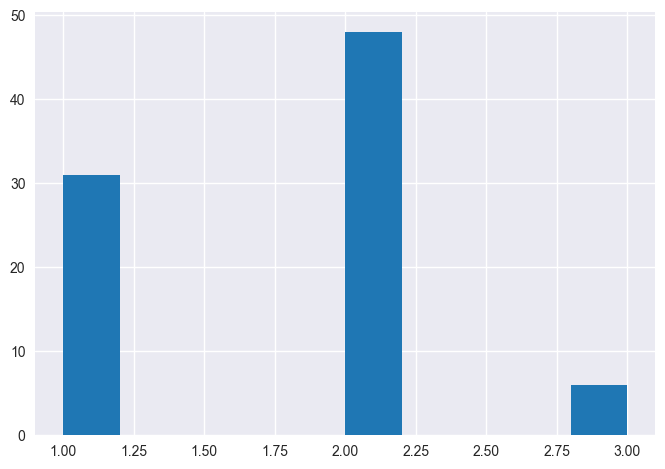

In [34]:
pm25_full['pm10_cat'].hist()

In [35]:
pm25_full.isnull().sum()

sitename        0
county          0
aqi             0
pollutant      21
status          0
so2             1
co              0
o3              0
o3_8hr          1
pm10            0
pm2.5           0
no2             1
nox             1
no              1
wind_speed      3
wind_direc      2
publishtime     0
co_8hr          0
pm2.5_avg       0
pm10_avg        0
so2_avg         0
longitude       0
latitude        0
siteid          0
pm2.5_cat       0
pm10_cat        0
dtype: int64

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit #依照總數各類別比例 分層抽樣

split = StratifiedShuffleSplit(n_splits= 1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(pm25_full, pm25_full["pm10_cat"]): #X = data , y = 依據y分層抽樣
  strat_train_set = pm25_full.loc[train_idx]
  strat_test_set = pm25_full.loc[test_idx]

In [37]:
strat_test_set["pm10_cat"].value_counts() / len(strat_test_set) #分層抽樣stratifiedshufflesplit 比例

2    0.588235
1    0.352941
3    0.058824
Name: pm10_cat, dtype: float64

In [38]:
pm25_full["pm10_cat"].value_counts() / len(pm25_full) #總數比例

2    0.564706
1    0.364706
3    0.070588
Name: pm10_cat, dtype: float64

In [39]:
# # 比較整體比例 分層抽樣比例 隨機抽樣比例
def pm10_cat_proportions(data):
    return data["pm10_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(pm25_full, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": pm10_cat_proportions(pm25_full),
    "Stratified": pm10_cat_proportions(strat_test_set),
    "Random": pm10_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [40]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.364706,0.352941,0.235294,-35.483871,-3.225806
2,0.564706,0.588235,0.647059,14.583333,4.166667
3,0.070588,0.058824,0.117647,66.666667,-16.666667


In [41]:
for set_ in (strat_train_set, strat_test_set): #移除pm10_cat 屬性
    set_.drop("pm10_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights
# 發現資料並將它視覺化取得見解

In [42]:
pm25 = pm25_full.copy()  #############


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

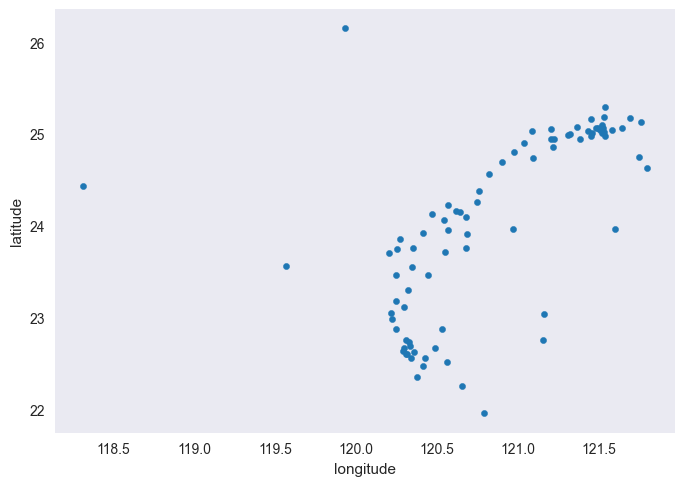

In [43]:
pm25.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

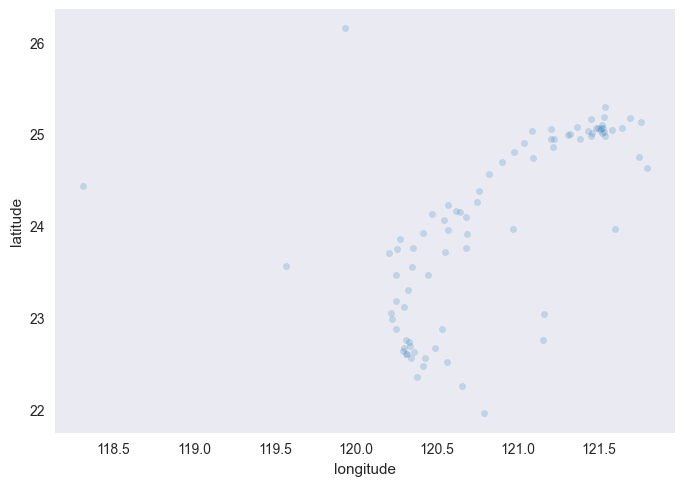

In [44]:
pm25.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2) #凸顯高密度的點


The argument sharex=False fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

Saving figure pm2.5_scatterplot


C:\Users\user\AppData\Local\Temp\ipykernel_3332\3756262967.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-dark', 'seaborn-notebook' ])
C:\Users\user\AppData\Local\Temp\ipykernel_3332\3756262967.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-dark', 'seaborn-notebook' ])


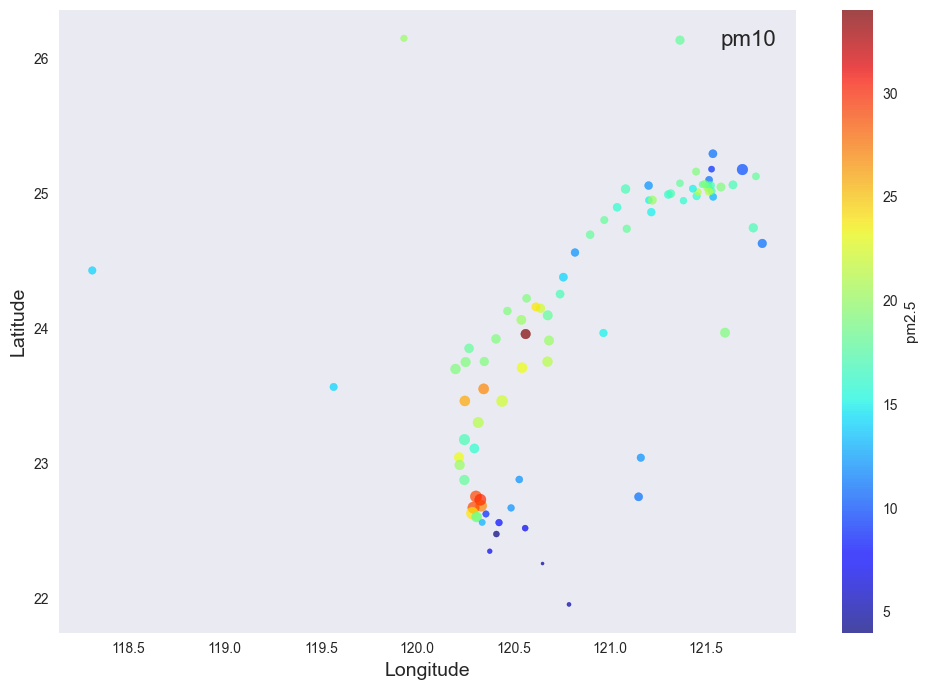

In [45]:
pm25.plot(kind='scatter', x='longitude', y='latitude', alpha=0.7,
          s=pm25['pm10'], label='pm10', figsize=(10,7),
          c='pm2.5', cmap=plt.get_cmap("jet"), colorbar=True,
          sharex=False) #s圓點直徑 代表pm10  c 顏色 代表pm2.5 sharex=False 把x y軸上的標籤顯示

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)



plt.legend(fontsize=16)
save_figure('pm2.5_scatterplot')

In [46]:
# Download the pm2.5_scatterplot image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://colab.research.google.com/drive/1ZrG8_fBOx1O4Zxn88s285gHhGHszP-Qx#scrollTo=nTOAFqpI43L9"
filename = "pm2.5_scatterplot.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\pm2.5_scatterplot.png',
 <http.client.HTTPMessage at 0x1fd9e82b340>)

# Looking for Correlations
# 尋找關聯性
* corr (係數1到-1(1:正相關到-1:負相關,0:非線性關係))
* xgb
* randomforest

In [47]:
corr_matrix = pm25.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_3332\2884363223.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pm25.corr()


In [48]:
%pip list

Package                         Version
------------------------------- ---------------------
absl-py                         1.4.0
affine                          2.3.1
aiofiles                        22.1.0
aiohttp                         3.8.4
aioice                          0.7.6
aiortc                          1.3.2
aiosignal                       1.2.0
aiosqlite                       0.18.0
alembic                         1.10.3
altair                          4.2.0
altgraph                        0.17.3
anyio                           3.5.0
apache-beam                     2.45.0
appdirs                         1.4.4
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
arrow                           1.2.3
asgiref                         3.6.0
astor                           0.8.1
asttokens                       2.0.5
astunparse                      1.6.3
async-generator                 1.10
async-timeout                   4.0.2
attrs                     

In [49]:
corr_matrix["pm2.5"].sort_values(ascending=False) #ascending=False 高到低

pm2.5        1.000000
pm2.5_avg    0.818421
pm10         0.718490
pm10_avg     0.633407
aqi          0.494365
no2          0.485628
nox          0.410975
co           0.287242
so2          0.276733
co_8hr       0.262818
so2_avg      0.195352
o3_8hr       0.150064
no           0.146687
latitude     0.049450
siteid      -0.100423
longitude   -0.179029
o3          -0.196293
Name: pm2.5, dtype: float64

Saving figure pm25_scatter_matrix_plot


C:\Users\user\AppData\Local\Temp\ipykernel_3332\3756262967.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-dark', 'seaborn-notebook' ])
C:\Users\user\AppData\Local\Temp\ipykernel_3332\3756262967.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-dark', 'seaborn-notebook' ])


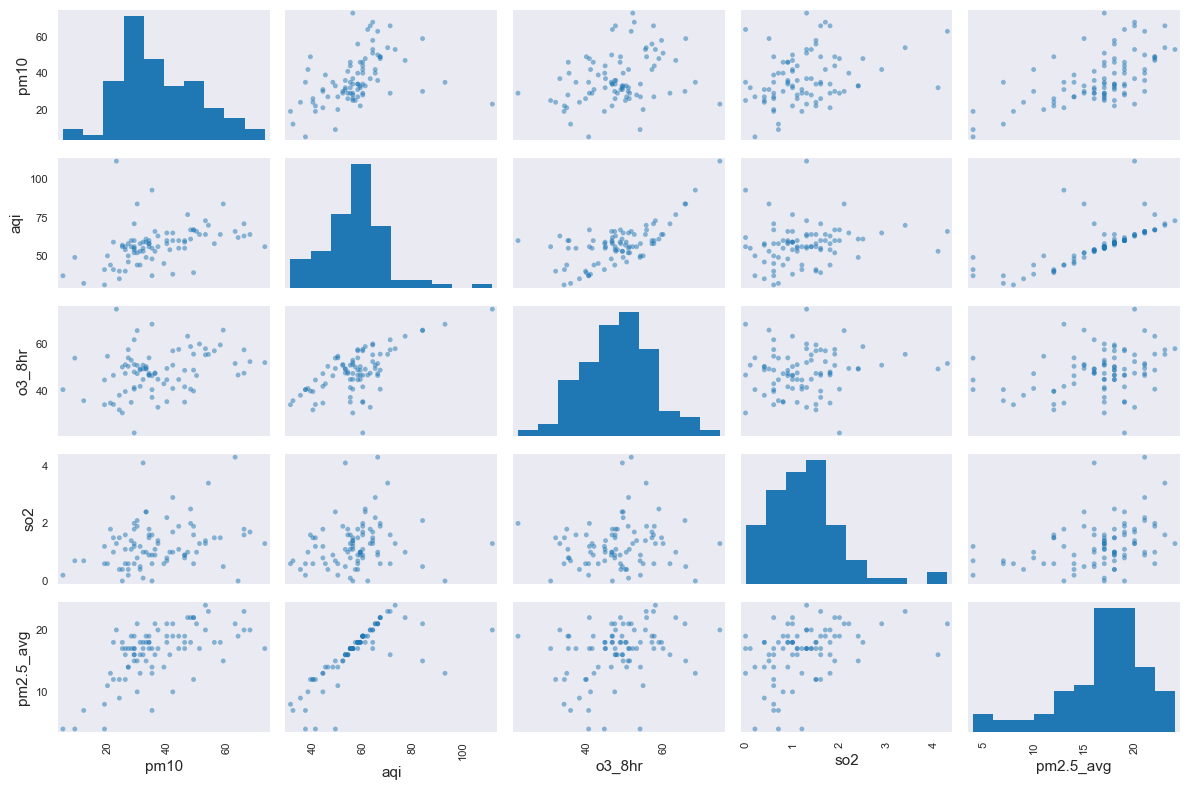

In [50]:
from pandas.plotting import scatter_matrix

attributes = ['pm10', 'aqi', 'o3_8hr', 'so2', 'pm2.5_avg'] 
scatter_matrix(pm25[attributes], figsize=(12,8))
save_figure("pm25_scatter_matrix_plot")

<AxesSubplot: xlabel='pm10', ylabel='pm2.5'>

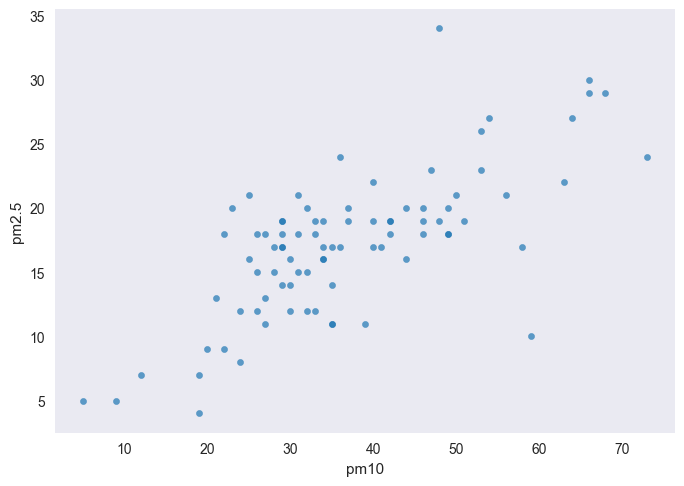

In [51]:
pm25.plot(kind='scatter', x='pm10', y='pm2.5', alpha=0.7)

## Experimenting with Attribute Combinations
## 用屬性組合進行實驗

In [52]:
# 依照 county 種類分群 每群顯示多個站點的 pm2.5 的平均
pm25['pm2.5'] = pm25['pm2.5'].astype(float)
print(pm25['pm2.5'].dtype)
# pm25['county_pm2.5_mean'] = pm25.groupby(by=['county']).agg( {'pm2.5': np.mean } )
# print(pm25['county_pm2.5_mean'] )
print(pm25.head())

float64
  sitename county  aqi pollutant status  so2    co    o3  o3_8hr  pm10  ...  \
0       基隆    基隆市   58     臭氧八小時     普通  0.6  0.30  49.0    57.5    27  ...   
1       汐止    新北市   53     細懸浮微粒     普通  1.1  0.28  31.2    47.6    36  ...   
2       萬里    新北市   84     臭氧八小時     普通  0.5  0.16  69.3    65.8    59  ...   
3       新店    新北市   46       NaN     良好  0.4  0.24  51.8    50.4    27  ...   
4       土城    新北市   52     細懸浮微粒     普通  1.9  0.28  47.8    50.8    30  ...   

           publishtime  co_8hr  pm2.5_avg  pm10_avg so2_avg   longitude  \
0  2023/05/09 22:00:00     0.2         17        33       0  121.760056   
1  2023/05/09 22:00:00     0.2         16        37       0  121.640810   
2  2023/05/09 22:00:00     0.1         15        66       0  121.689881   
3  2023/05/09 22:00:00     0.2         14        35       0  121.537778   
4  2023/05/09 22:00:00     0.2         15        36       1  121.451861   

    latitude  siteid  pm2.5_cat  pm10_cat  
0  25.129167       1  

In [53]:
# pm25 = pm25.drop(['county_pm2.5_mean'], axis=1)
####

corr_matrix = pm25.corr()
corr_matrix["pm2.5"].sort_values(ascending=False) #ascending=False 高到低


C:\Users\user\AppData\Local\Temp\ipykernel_3332\3720018842.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pm25.corr()


pm2.5        1.000000
pm2.5_avg    0.818421
pm10         0.718490
pm10_avg     0.633407
aqi          0.494365
no2          0.485628
nox          0.410975
co           0.287242
so2          0.276733
co_8hr       0.262818
so2_avg      0.195352
o3_8hr       0.150064
no           0.146687
latitude     0.049450
siteid      -0.100423
longitude   -0.179029
o3          -0.196293
Name: pm2.5, dtype: float64

# Prepare the Data for Machine Learning Algorithms
準備資料 提供給機器學習

In [54]:
pm25_full['pm2.5'] = pm25_full['pm2.5'].fillna(value = pm25_full['pm2.5'].mean()) #label 缺失先補起來

pm25 = pm25_full.drop( ["pm2.5"], axis=1) # drop labels for training set
print(pm25.isnull().sum())

print(pm25_full['pm2.5'].isnull().sum())

pm25_labels = pm25_full["pm2.5"].values.copy()

sitename        0
county          0
aqi             0
pollutant      21
status          0
so2             1
co              0
o3              0
o3_8hr          1
pm10            0
no2             1
nox             1
no              1
wind_speed      3
wind_direc      2
publishtime     0
co_8hr          0
pm2.5_avg       0
pm10_avg        0
so2_avg         0
longitude       0
latitude        0
siteid          0
pm2.5_cat       0
pm10_cat        0
dtype: int64
0


In [55]:
# 檢查缺失值
print(pm25.isnull().sum())

sitename        0
county          0
aqi             0
pollutant      21
status          0
so2             1
co              0
o3              0
o3_8hr          1
pm10            0
no2             1
nox             1
no              1
wind_speed      3
wind_direc      2
publishtime     0
co_8hr          0
pm2.5_avg       0
pm10_avg        0
so2_avg         0
longitude       0
latitude        0
siteid          0
pm2.5_cat       0
pm10_cat        0
dtype: int64


# Data Cleaning
資料清理

In [56]:
# pm25.dropna(subset=["pollutant"])    # option 1 數量很少的狀況下
# pm25.drop("pollutant", axis=1)       # option 2 數量太多，只好把整個欄位資料刪除
# median = pm25["pollutant"].median()  # option 3  # 建立在缺失資料欄位是數值資料時候
# housing["pollutant"].fillna(median, inplace=True)

To demonstrate each of them, let's create a copy of the dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [57]:
sample_incomplete_rows = pm25[pm25.isnull().any(axis=1)].head()
sample_incomplete_rows

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,pm2.5_cat,pm10_cat
3,新店,新北市,46,NaN,良好,0.4,0.24,51.8,50.4,27,...,2023/05/09 22:00:00,0.2,14,35,0,121.537778,24.977222,4,2,1
9,淡水,新北市,56,細懸浮微粒,普通,1.2,0.46,23.8,40.7,29,...,2023/05/09 22:00:00,0.2,17,29,0,121.449239,25.164500,10,2,1
10,士林,臺北市,50,NaN,良好,0.2,0.21,56.5,54.0,27,...,2023/05/09 22:00:00,0.2,14,31,0,121.516664,25.103340,11,2,1
13,古亭,臺北市,52,細懸浮微粒,普通,NaN,0.24,51.7,51.2,29,...,2023/05/09 22:00:00,0.2,15,36,0,121.529556,25.020608,14,2,1
17,大園,桃園市,49,NaN,良好,2.4,0.21,48.3,49.5,33,...,2023/05/09 22:00:00,0.1,15,38,1,121.202515,25.061004,18,2,2


In [58]:
sample_incomplete_rows.dropna(subset=["pollutant"])    # option 1

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,pm2.5_cat,pm10_cat
9,淡水,新北市,56,細懸浮微粒,普通,1.2,0.46,23.8,40.7,29,...,2023/05/09 22:00:00,0.2,17,29,0,121.449239,25.164500,10,2,1
13,古亭,臺北市,52,細懸浮微粒,普通,NaN,0.24,51.7,51.2,29,...,2023/05/09 22:00:00,0.2,15,36,0,121.529556,25.020608,14,2,1


In [59]:
sample_incomplete_rows.drop("pollutant", axis=1)       # option 2

,sitename,county,aqi,status,so2,co,o3,o3_8hr,pm10,no2,...,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,pm2.5_cat,pm10_cat
3,新店,新北市,46,良好,0.4,0.24,51.8,50.4,27,7.8,...,2023/05/09 22:00:00,0.2,14,35,0,121.537778,24.977222,4,2,1
9,淡水,新北市,56,普通,1.2,0.46,23.8,40.7,29,13.8,...,2023/05/09 22:00:00,0.2,17,29,0,121.449239,25.164500,10,2,1
10,士林,臺北市,50,良好,0.2,0.21,56.5,54.0,27,6.4,...,2023/05/09 22:00:00,0.2,14,31,0,121.516664,25.103340,11,2,1
13,古亭,臺北市,52,普通,NaN,0.24,51.7,51.2,29,8.4,...,2023/05/09 22:00:00,0.2,15,36,0,121.529556,25.020608,14,2,1
17,大園,桃園市,49,良好,2.4,0.21,48.3,49.5,33,13.1,...,2023/05/09 22:00:00,0.1,15,38,1,121.202515,25.061004,18,2,2


In [60]:
# median = pm25["pollutant"].median()
# sample_incomplete_rows["pollutant"].fillna(median, inplace=True) # option 3  # 使用在數值資料 在TypeError: could not convert string to float: '細懸浮微粒'

In [61]:
print(pm25["wind_speed"][pm25["wind_speed"] == '-' ] )
print(pm25["wind_direc"][pm25["wind_direc"] == '-' ] )
print(pm25["wind_direc"])

print(float('0.0'))

pm25["wind_speed"][pm25["wind_speed"] == '-' ] = '0.0' # 發現資料除了Na 外 還有標記 '-' 的風速資料
pm25["wind_direc"][pm25["wind_direc"] == '-' ] = '0.0' # 發現資料除了Na 外 還有標記 '-' 的風速資料

pm25.wind_speed = pm25.wind_speed.astype(float)  ### pandas astype(int float .....) 這樣改型別
pm25.wind_direc = pm25.wind_direc.astype(float)

median = pm25["wind_speed"].median()
print('wind_speed median', median)
sample_incomplete_rows["wind_speed"].fillna(median, inplace=True) # option 3  # 使用在數值資料 在TypeError: could not convert string to float: '細懸浮微粒'

15    -
65    -
Name: wind_speed, dtype: object
15    -
65    -
Name: wind_direc, dtype: object
0     336
1      24
2      50
3     137
4     338
     ... 
80    357
81    135
82     77
83    130
84     85
Name: wind_direc, Length: 85, dtype: object
0.0
wind_speed median 1.65


C:\Users\user\AppData\Local\Temp\ipykernel_3332\420625034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25["wind_speed"][pm25["wind_speed"] == '-' ] = '0.0' # 發現資料除了Na 外 還有標記 '-' 的風速資料
C:\Users\user\AppData\Local\Temp\ipykernel_3332\420625034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25["wind_direc"][pm25["wind_direc"] == '-' ] = '0.0' # 發現資料除了Na 外 還有標記 '-' 的風速資料


In [62]:
sample_incomplete_rows

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,pm2.5_cat,pm10_cat
3,新店,新北市,46,NaN,良好,0.4,0.24,51.8,50.4,27,...,2023/05/09 22:00:00,0.2,14,35,0,121.537778,24.977222,4,2,1
9,淡水,新北市,56,細懸浮微粒,普通,1.2,0.46,23.8,40.7,29,...,2023/05/09 22:00:00,0.2,17,29,0,121.449239,25.164500,10,2,1
10,士林,臺北市,50,NaN,良好,0.2,0.21,56.5,54.0,27,...,2023/05/09 22:00:00,0.2,14,31,0,121.516664,25.103340,11,2,1
13,古亭,臺北市,52,細懸浮微粒,普通,NaN,0.24,51.7,51.2,29,...,2023/05/09 22:00:00,0.2,15,36,0,121.529556,25.020608,14,2,1
17,大園,桃園市,49,NaN,良好,2.4,0.21,48.3,49.5,33,...,2023/05/09 22:00:00,0.1,15,38,1,121.202515,25.061004,18,2,2


## Scikit-Learn SimpleImputer() 可以處理缺漏值，()指名要用各個屬性的"中位數"取代缺漏值

In [63]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

移除文字資料

In [64]:
# print(pm25.info())
# print(pm25['sitename'].dtype)
cat_attribs = []###################
num_attribs = []##################


print(pm25.wind_speed.dtype)


for col in pm25.columns:
  # print(col)
  if pm25[col].dtype == 'object':
    cat_attribs.append(col)
  if pm25[col].dtype != 'object':
    num_attribs.append(col)

print('object col', cat_attribs)
print('num col', num_attribs)

pm25_num = pm25.drop(cat_attribs, axis=1)
print(pm25_num.isnull().sum())
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

float64
object col ['sitename', 'county', 'pollutant', 'status', 'publishtime']
num col ['aqi', 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'no2', 'nox', 'no', 'wind_speed', 'wind_direc', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude', 'siteid', 'pm2.5_cat', 'pm10_cat']
aqi           0
so2           1
co            0
o3            0
o3_8hr        1
pm10          0
no2           1
nox           1
no            1
wind_speed    3
wind_direc    2
co_8hr        0
pm2.5_avg     0
pm10_avg      0
so2_avg       0
longitude     0
latitude      0
siteid        0
pm2.5_cat     0
pm10_cat      0
dtype: int64


In [65]:
imputer.fit(pm25_num)

SimpleImputer(strategy='median')

In [66]:
imputer.statistics_

array([ 58.      ,   1.15    ,   0.25    ,  43.8     ,  48.35    ,
        34.      ,   9.45    ,  10.3     ,   0.7     ,   1.65    ,
        63.      ,   0.2     ,  17.      ,  38.      ,   1.      ,
       120.685306,  24.131672,  43.      ,   2.      ,   2.      ])

Check that this is the same as manually computing the median of each attribute:

In [67]:
pm25_num.median(axis=0).values

C:\Users\user\AppData\Local\Temp\ipykernel_3332\3223317338.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pm25_num.median(axis=0).values


array([ 58.      ,   1.15    ,   0.25    ,  43.8     ,  48.35    ,
        34.      ,   9.45    ,  10.3     ,   0.7     ,   1.65    ,
        63.      ,   0.2     ,  17.      ,  38.      ,   1.      ,
       120.685306,  24.131672,  43.      ])

Transform the training set:

In [68]:
X = imputer.transform(pm25_num)
X

array([[5.80e+01, 6.00e-01, 3.00e-01, ..., 1.00e+00, 2.00e+00, 1.00e+00],
       [5.30e+01, 1.10e+00, 2.80e-01, ..., 2.00e+00, 2.00e+00, 2.00e+00],
       [8.40e+01, 5.00e-01, 1.60e-01, ..., 3.00e+00, 1.00e+00, 2.00e+00],
       ...,
       [5.80e+01, 9.00e-01, 3.40e-01, ..., 3.10e+02, 2.00e+00, 2.00e+00],
       [5.60e+01, 0.00e+00, 2.80e-01, ..., 3.11e+02, 2.00e+00, 1.00e+00],
       [3.70e+01, 2.00e-01, 8.00e-02, ..., 3.13e+02, 1.00e+00, 1.00e+00]])

In [69]:
pm25_tr = pd.DataFrame(X, columns=pm25_num.columns, index=pm25_num.index)

In [70]:
pm25_tr.loc[sample_incomplete_rows.index.values]

,aqi,so2,co,o3,o3_8hr,pm10,no2,nox,no,wind_speed,wind_direc,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,pm2.5_cat,pm10_cat
3,46.0,0.40,0.24,51.8,50.4,27.0,7.8,8.7,0.9,1.80,137.0,0.2,14.0,35.0,0.0,121.537778,24.977222,4.0,2.0,1.0
9,56.0,1.20,0.46,23.8,40.7,29.0,13.8,14.8,0.9,1.65,63.0,0.2,17.0,29.0,0.0,121.449239,25.164500,10.0,2.0,1.0
10,50.0,0.20,0.21,56.5,54.0,27.0,6.4,6.8,0.4,1.60,44.0,0.2,14.0,31.0,0.0,121.516664,25.103340,11.0,2.0,1.0
13,52.0,1.15,0.24,51.7,51.2,29.0,8.4,9.2,0.8,1.50,56.0,0.2,15.0,36.0,0.0,121.529556,25.020608,14.0,2.0,1.0
17,49.0,2.40,0.21,48.3,49.5,33.0,13.1,13.7,0.6,2.60,46.0,0.1,15.0,38.0,1.0,121.202515,25.061004,18.0,2.0,2.0


In [71]:
imputer.strategy #採用什麼  補值策略

'median'

In [72]:
pm25_tr = pd.DataFrame(X, columns=pm25_num.columns, index=pm25_num.index)


In [73]:
pm25_tr.head()

,aqi,so2,co,o3,o3_8hr,pm10,no2,nox,no,wind_speed,wind_direc,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,pm2.5_cat,pm10_cat
0,58.0,0.6,0.30,49.0,57.5,27.0,8.6,9.0,0.4,0.2,336.0,0.2,17.0,33.0,0.0,121.760056,25.129167,1.0,2.0,1.0
1,53.0,1.1,0.28,31.2,47.6,36.0,21.3,22.3,1.0,0.3,24.0,0.2,16.0,37.0,0.0,121.640810,25.066240,2.0,2.0,2.0
2,84.0,0.5,0.16,69.3,65.8,59.0,1.6,2.1,0.4,4.2,50.0,0.1,15.0,66.0,0.0,121.689881,25.179667,3.0,1.0,2.0
3,46.0,0.4,0.24,51.8,50.4,27.0,7.8,8.7,0.9,1.8,137.0,0.2,14.0,35.0,0.0,121.537778,24.977222,4.0,2.0,1.0
4,52.0,1.9,0.28,47.8,50.8,30.0,10.1,10.4,0.3,1.4,338.0,0.2,15.0,36.0,1.0,121.451861,24.982528,5.0,2.0,1.0


# Handling Text and Categorical Attributes

# 處理文件和分類屬性(非數值)

In [74]:
pm25

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,pm2.5_cat,pm10_cat
0,基隆,基隆市,58,臭氧八小時,普通,0.6,0.30,49.0,57.5,27,...,2023/05/09 22:00:00,0.2,17,33,0,121.760056,25.129167,1,2,1
1,汐止,新北市,53,細懸浮微粒,普通,1.1,0.28,31.2,47.6,36,...,2023/05/09 22:00:00,0.2,16,37,0,121.640810,25.066240,2,2,2
2,萬里,新北市,84,臭氧八小時,普通,0.5,0.16,69.3,65.8,59,...,2023/05/09 22:00:00,0.1,15,66,0,121.689881,25.179667,3,1,2
3,新店,新北市,46,NaN,良好,0.4,0.24,51.8,50.4,27,...,2023/05/09 22:00:00,0.2,14,35,0,121.537778,24.977222,4,2,1
4,土城,新北市,52,細懸浮微粒,普通,1.9,0.28,47.8,50.8,30,...,2023/05/09 22:00:00,0.2,15,36,1,121.451861,24.982528,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,臺南(麻豆),臺南市,64,臭氧八小時,普通,1.5,0.20,42.5,59.5,58,...,2023/05/09 22:00:00,0.2,18,57,1,120.245831,23.179047,203,2,2
81,屏東(琉球),屏東縣,32,NaN,良好,0.7,0.20,38.6,35.8,12,...,2023/05/09 22:00:00,0.2,7,7,0,120.377220,22.352220,204,1,1
82,桃園(三民),桃園市,58,細懸浮微粒,普通,0.9,0.34,53.6,54.0,34,...,2023/05/09 22:00:00,0.3,18,38,0,121.317881,25.001327,310,2,2
83,新北(樹林),新北市,56,細懸浮微粒,普通,0.0,0.28,31.3,30.6,25,...,2023/05/09 22:00:00,0.3,17,35,0,121.383528,24.949028,311,2,1


In [75]:
pm25_cat = pm25[['status']] #針對種類 分類屬性 進行轉換
pm25_cat.head(10)

,status
0,普通
1,普通
2,普通
3,良好
4,普通
5,普通
6,普通
7,普通
8,普通
9,普通


In [76]:
pm25_cat =  pm25[['sitename'] ] #針對種類 分類屬性 進行轉換
print(pm25_cat)
# pm25_cat.head(10)



   sitename
0        基隆
1        汐止
2        萬里
3        新店
4        土城
..      ...
80   臺南(麻豆)
81   屏東(琉球)
82   桃園(三民)
83   新北(樹林)
84   屏東(枋山)

[85 rows x 1 columns]


In [77]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
pm25_cat_encoded = ordinal_encoder.fit_transform(pm25_cat)
pm25_cat_encoded[:10]

array([[15.],
       [54.],
       [71.],
       [39.],
       [13.],
       [46.],
       [43.],
       [69.],
       [47.],
       [56.]])

In [78]:
#categories_ 查看分類清單
ordinal_encoder.categories_

[array(['三義', '三重', '中壢', '中山', '二林', '仁武', '冬山', '前金', '前鎮', '南投', '古亭',
        '善化', '嘉義', '土城', '埔里', '基隆', '士林', '大同', '大園', '大城', '大寮', '大里',
        '安南', '宜蘭', '富貴角', '小港', '屏東', '屏東(枋山)', '屏東(琉球)', '崙背', '左營',
        '平鎮', '彰化', '彰化(員林)', '復興', '忠明', '恆春', '斗六', '新北(樹林)', '新店', '新港',
        '新營', '新竹', '新莊', '朴子', '松山', '板橋', '林口', '林園', '桃園', '桃園(三民)',
        '楠梓', '橋頭', '永和', '汐止', '沙鹿', '淡水', '湖口', '潮州', '竹山', '竹東', '線西',
        '美濃', '臺南', '臺南(麻豆)', '臺東', '臺西', '花蓮', '苗栗', '菜寮', '萬華', '萬里',
        '西屯', '觀音', '豐原', '金門', '關山', '陽明', '頭份', '馬公', '馬祖', '高雄(湖內)',
        '鳳山', '麥寮', '龍潭'], dtype=object)]

如果資料有相似度，距離遠近關係要呈現出，那麼最好使用One-Hot Encoding

* 輸出scipy 稀疏矩陣 不是numpy 陣列
* 稀疏矩陣只儲存非零元素
* 想要轉換成密集Numpy陣列，可以呼叫toarray()

In [79]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
pm25_cat_1hot = cat_encoder.fit_transform(pm25_cat)
pm25_cat_1hot

# 輸出scipy 稀疏矩陣 不是numpy 陣列

<85x85 sparse matrix of type '<class 'numpy.float64'>'
	with 85 stored elements in Compressed Sparse Row format>

By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:

In [80]:
pm25_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
pm25_cat = pm25[['county']] #針對種類 分類屬性 進行轉換
pm25_cat.head(10)

,county
0,基隆市
1,新北市
2,新北市
3,新北市
4,新北市
5,新北市
6,新北市
7,新北市
8,新北市
9,新北市


In [82]:
cat_encoder = OneHotEncoder()
pm25_cat_1hot = cat_encoder.fit_transform(pm25_cat)
pm25_cat_1hot

<85x22 sparse matrix of type '<class 'numpy.float64'>'
	with 85 stored elements in Compressed Sparse Row format>

In [83]:
pm25_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Alternatively, you can set sparse=False when creating the OneHotEncoder:

In [84]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(pm25_cat)
housing_cat_1hot

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
cat_encoder.categories_


[array(['南投縣', '嘉義市', '嘉義縣', '基隆市', '宜蘭縣', '屏東縣', '彰化縣', '新北市', '新竹市',
        '新竹縣', '桃園市', '澎湖縣', '臺中市', '臺北市', '臺南市', '臺東縣', '花蓮縣', '苗栗縣',
        '連江縣', '金門縣', '雲林縣', '高雄市'], dtype=object)]

# Custom Transformers
# 自訂轉換器
Let's create a custom transformer to add extra attributes:

透過scikit-learn 要建立一個類別，三個方法
* fit()回傳自己
* transform()
* fit_transform

TransformerMixin 取得 fit_transform方法

BaseEstimator 會有 get_params() set_params()

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

# # column index
# rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
#         self.add_bedrooms_per_room = add_bedrooms_per_room
#     def fit(self, X, y=None):
#         return self  # nothing else to do
#     def transform(self, X):
#         rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
#         population_per_household = X[:, population_ix] / X[:, households_ix]
#         if self.add_bedrooms_per_room:
#             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
#             return np.c_[X, rooms_per_household, population_per_household,
#                          bedrooms_per_room]
#         else:
#             return np.c_[X, rooms_per_household, population_per_household]

# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transform(housing.values)

Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [87]:
# col_names = "total_rooms", "total_bedrooms", "population", "households"
# rooms_ix, bedrooms_ix, population_ix, households_ix = [
#     housing.columns.get_loc(c) for c in col_names] # get the column indices

Also, housing_extra_attribs is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a DataFrame, you could run this:

In [88]:
# housing_extra_attribs = pd.DataFrame(
#     housing_extra_attribs,
#     columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
#     index=housing.index)
# housing_extra_attribs.head()

# Transformation Pipelines 特徵縮放 轉換pipeline

Now let's build a pipeline for preprocessing the numerical attributes:

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pm25_full['pm2.5'] = pm25_full['pm2.5'].fillna(value = pm25_full['pm2.5'].mean()) #label 缺失先補起來

pm25 = pm25_full.drop( ["pm2.5"], axis=1) # drop labels for training set
# print(pm25.isnull().sum())
# print(pm25_full['pm2.5'].isnull().sum())

pm25_labels = pm25_full["pm2.5"].values.copy()

# print(pm25["wind_speed"][pm25["wind_speed"] == '-' ] )
# print(pm25["wind_direc"][pm25["wind_direc"] == '-' ] )


pm25["wind_speed"][pm25["wind_speed"] == '-' ] = '0.0' # 發現資料除了Na 外 還有標記 '-' 的風速資料
pm25["wind_direc"][pm25["wind_direc"] == '-' ] = '0.0' # 發現資料除了Na 外 還有標記 '-' 的風速資料

pm25.wind_speed = pm25.wind_speed.astype(float)  ### pandas astype(int float .....) 這樣改型別
pm25.wind_direc = pm25.wind_direc.astype(float)

# median = pm25["wind_speed"].median()
# print('wind_speed median', median)


cat_attribs = []###################
num_attribs = []##################


for col in pm25.columns:
  # print(col)
  if pm25[col].dtype == 'object':
    cat_attribs.append(col)
  if pm25[col].dtype != 'object':
    num_attribs.append(col)

print('object col', cat_attribs)
print('num col', num_attribs)

pm25_num = pm25.drop(cat_attribs, axis=1)
print(pm25_num.isnull().sum())




imputer = SimpleImputer(strategy="median")

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), #缺失補值策略
    ('std_scaler', StandardScaler()), #特徵縮放
])

pm25_tr = num_pipeline.fit_transform(pm25_num)
print(pm25_tr.shape)
print('check pm25 num nan',np.isnan(pm25_tr).sum())
print('check pm25 cat nan', pm25[cat_attribs].isnull().sum())

# ###### data cat 屬性缺失 補起來
'''
sitename       0
county          0
pollutant      45
status          2
publishtime     0'''

pm25.sitename = pm25.sitename.astype(object)  ### pandas astype(int float .....) 這樣改型別
pm25.county = pm25.county.astype(object)  ### pandas astype(int float .....) 這樣改型別
pm25.pollutant = pm25.pollutant.astype(object)
pm25.status = pm25.status.astype(object)
pm25.publishtime = pm25.publishtime.astype(object)

pm25['sitename'] = pm25['sitename'].fillna(value = pm25['sitename'].value_counts().keys()[0] ) #label 缺失先補起來
pm25['county'] = pm25['county'].fillna(value = pm25['county'].value_counts().keys()[0] ) #label 缺失先補起來
pm25['pollutant'] = pm25['pollutant'].fillna(value = pm25['pollutant'].value_counts().keys()[0] ) #label 缺失先補起來
pm25['status'] = pm25['status'].fillna(value = pm25['status'].value_counts().keys()[0] ) #label 缺失先補起來
pm25['publishtime'] = pm25['publishtime'].fillna(value = pm25['publishtime'].value_counts().keys()[0] ) #label 缺失先補起來

print('check pm25 cat nan', pm25[cat_attribs].isnull().sum())





object col ['sitename', 'county', 'pollutant', 'status', 'publishtime']
num col ['aqi', 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'no2', 'nox', 'no', 'wind_speed', 'wind_direc', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude', 'siteid', 'pm2.5_cat', 'pm10_cat']
aqi           0
so2           1
co            0
o3            0
o3_8hr        1
pm10          0
no2           1
nox           1
no            1
wind_speed    3
wind_direc    2
co_8hr        0
pm2.5_avg     0
pm10_avg      0
so2_avg       0
longitude     0
latitude      0
siteid        0
pm2.5_cat     0
pm10_cat      0
dtype: int64
(85, 20)
check pm25 num nan 0
check pm25 cat nan sitename        0
county          0
pollutant      21
status          0
publishtime     0
dtype: int64
check pm25 cat nan sitename       0
county         0
pollutant      0
status         0
publishtime    0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_3332\1479579241.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25["wind_speed"][pm25["wind_speed"] == '-' ] = '0.0' # 發現資料除了Na 外 還有標記 '-' 的風速資料
C:\Users\user\AppData\Local\Temp\ipykernel_3332\1479579241.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25["wind_direc"][pm25["wind_direc"] == '-' ] = '0.0' # 發現資料除了Na 外 還有標記 '-' 的風速資料


# ColumnTransformer() 跟pandas可搭配，可以處理 所有欄位(數值和分類欄位)

In [90]:
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import StratifiedShuffleSplit #依照總數各類別比例 分層抽樣




full_pipeline= ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),

])


pm25_prepared = full_pipeline.fit_transform(pm25)   ########要用全部的資料集





pm25_prepared = pm25_prepared.toarray()   ## 稀疏(只儲存1元素)轉 密集矩陣(0和1)

In [91]:
pm25_prepared.dtype = np.float64   ##### 不要用np.float32  對密集矩陣 更改型態!  要用np.float64 ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

print(pm25_prepared.dtype)  

float64


In [92]:
pm25_prepared.shape

(85, 133)

In [93]:
print(pm25_prepared)

[[ 0.06216893 -0.82962974  0.16549828 ...  1.          0.
   1.        ]
 [-0.33218625 -0.20168203  0.00743813 ...  1.          0.
   1.        ]
 [ 2.11281587 -0.95521928 -0.94092282 ...  1.          0.
   1.        ]
 ...
 [ 0.06216893 -0.45286111  0.4816186  ...  1.          0.
   1.        ]
 [-0.09557314 -1.58316698  0.00743813 ...  1.          0.
   1.        ]
 [-1.59412282 -1.3319879  -1.57316345 ...  0.          1.
   1.        ]]


In [94]:
# ####分層抽樣比例

if pm25_full["pm10_cat"].isnull().sum() == 0:
  split = StratifiedShuffleSplit(n_splits= 1, test_size=0.2, random_state=42)
  for train_idx, test_idx in split.split(pm25_prepared, pm25_full["pm10_cat"]): #X = data , y = 依據y分層抽樣
    X_train = pm25_prepared[train_idx]
    X_test = pm25_prepared[test_idx]
    y_train = pm25_labels[train_idx]
    y_test = pm25_labels[test_idx]
  
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(68, 133) (17, 133) (68,) (17,)


For reference, here is the old solution based on a DataFrameSelector transformer (to just select a subset of the Pandas DataFrame columns), and a FeatureUnion:

In [95]:
# from sklearn.base import BaseEstimator, TransformerMixin

# # Create a class to select numerical or categorical columns 
# class OldDataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [96]:
# num_attribs = list(housing_num)
# cat_attribs = ["ocean_proximity"]

# old_num_pipeline = Pipeline([
#         ('selector', OldDataFrameSelector(num_attribs)),
#         ('imputer', SimpleImputer(strategy="median")),
#         ('attribs_adder', CombinedAttributesAdder()),
#         ('std_scaler', StandardScaler()),
#     ])

# old_cat_pipeline = Pipeline([
#         ('selector', OldDataFrameSelector(cat_attribs)),
#         ('cat_encoder', OneHotEncoder(sparse=False)),
#     ])

In [97]:
# from sklearn.pipeline import FeatureUnion

# old_full_pipeline = FeatureUnion(transformer_list=[
#         ("num_pipeline", old_num_pipeline),
#         ("cat_pipeline", old_cat_pipeline),
#     ])

In [98]:
# old_housing_prepared = old_full_pipeline.fit_transform(housing)
# old_housing_prepared

The result is the same as with the ColumnTransformer:

In [99]:
# np.allclose(housing_prepared, old_housing_prepared)

# Select and Train a Model
# 選擇與訓練模型
# Training and Evaluating on the Training Set
# 訓練和評估使用測試集

In [100]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# print(np.isnan(pm25_prepared).sum() )


# print(np.where( np.isnan(pm25_labels))[0]) ##[]
# # <class 'numpy.ndarray'>
# print( type(pm25_labels))



lin_reg.fit(X_train, y_train)

LinearRegression()

In [101]:
# let's try the full preprocessing pipeline on a few training instances
# some_data = pm25.iloc[:5]
# some_labels = pm25_labels.iloc[:5]
some_data = pm25[:5]
some_labels = pm25_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [18. 17. 10. 13. 16.]


Compare against the actual values:


In [102]:
print("Labels:", list(some_labels))

Labels: [18, 17, 10, 13, 16]


In [103]:
print(some_data_prepared)

  (0, 0)	0.0621689341591256
  (0, 1)	-0.8296297357694803
  (0, 2)	0.165498282197703
  (0, 3)	0.48964318638543314
  (0, 4)	1.036981377244222
  (0, 5)	-0.7301532654878116
  (0, 6)	-0.29871716128567055
  (0, 7)	-0.31796330799973654
  (0, 8)	-0.25488349311673825
  (0, 9)	-1.31452609458196
  (0, 10)	1.8051893020049523
  (0, 11)	-0.3248268603939943
  (0, 12)	0.12837218356556462
  (0, 13)	-0.426952072017649
  (0, 14)	-0.9438696046109731
  (0, 15)	1.5558327081986285
  (0, 16)	1.0982129639204405
  (0, 17)	-0.8866031984905074
  (0, 18)	-0.18432718211678423
  (0, 19)	-1.1952286093343933
  (0, 35)	1.0
  (0, 108)	1.0
  (0, 128)	1.0
  (0, 130)	1.0
  (0, 132)	1.0
  :	:
  (4, 0)	-0.41105728108197925
  (4, 1)	0.8030343034562997
  (4, 2)	0.007438125042593733
  (4, 3)	0.37416664300667174
  (4, 4)	0.30066706474427185
  (4, 5)	-0.5084995956075831
  (4, 6)	-0.03883017347316297
  (4, 7)	-0.14007128330782948
  (4, 8)	-0.2888946342704631
  (4, 9)	-0.3530226048196086
  (4, 10)	1.821963403198767
  (4, 11)	-0.324

In [104]:
from sklearn.metrics import mean_squared_error

pm25_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, pm25_predictions)
lin_rmse = np.sqrt(lin_mse) #開更號
lin_rmse

4.077434928413466e-14

In [105]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, pm25_predictions)
lin_mae

3.186993153041626e-14

In [106]:
from sklearn.tree import DecisionTreeRegressor



tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [107]:
pm25_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, pm25_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Better Evaluation Using Cross-Validation
# 使用交叉驗證獲得更好的評估

In [108]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) #交叉驗證功能 期望收到一個效用函數越大越好，跟損失函數相反，所以評分函數 是mse的相反


In [109]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2.17124059 2.61861468 1.8516402  2.44948974 5.14087263 3.38061702
 2.80305955 2.50713268 1.52752523 5.19615242]
Mean: 2.9646344759803784
Standard deviation: 1.2017802449540764


In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores) #交叉驗證功能 期望收到一個效用函數越大越好，跟損失函數相反，所以評分函數 是mse的相反

In [111]:
display_scores(lin_rmse_scores)

Scores: [2.18749042 2.94007291 1.44650565 2.73578137 5.01686079 1.61376064
 2.00258491 3.69706079 1.2482539  2.8222772 ]
Mean: 2.5710648580488855
Standard deviation: 1.0898340736365328


In [112]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [113]:
pm25_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, pm25_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.98388934098003

In [114]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.09529746 1.85500096 2.21770473 2.9773694  2.50498646 2.77502896
 2.47253196 3.35981717 1.36686381 4.77232822]
Mean: 2.6396929129933744
Standard deviation: 0.8919315003311794


In [115]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      2.571065
std       1.148786
min       1.248254
25%       1.710967
50%       2.461636
75%       2.910624
max       5.016861
dtype: float64

In [116]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
pm25_predictions = svm_reg.predict(X_train)
svm_mse = mean_squared_error(y_train, pm25_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.7302636619051224

In [117]:
svm_reg_scores = cross_val_score(svm_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
svm_reg_rmse_scores = np.sqrt(-svm_reg_scores)
display_scores(svm_reg_rmse_scores)

Scores: [2.10267143 2.84564378 1.81834187 3.09285829 4.6614776  1.78174531
 1.95695156 4.09069638 1.10257293 2.83530716]
Mean: 2.62882663091189
Standard deviation: 1.0490872449060622


In [118]:
display_scores(svm_rmse) #最佳

Scores: 0.7302636619051224
Mean: 0.7302636619051224
Standard deviation: 0.0


# Fine-Tune Your Model
# 微調模型

# 網格搜尋
# Grid Search

In [119]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [120]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [121]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10,bootstrap=False, max_features= 4, random_state=42)
forest_reg.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.43656806 2.49112711 2.53799696 4.34757732 2.11929908 3.45914936
 2.6349302  3.21558704 3.10678022 6.20617972]
Mean: 3.355519505449633
Standard deviation: 1.1257091060323687


In [122]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=10,
                      random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:


In [123]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.635334376970532 {'max_features': 2, 'n_estimators': 3}
3.7099420924955595 {'max_features': 2, 'n_estimators': 10}
3.5407933204604496 {'max_features': 2, 'n_estimators': 30}
4.212415511846433 {'max_features': 4, 'n_estimators': 3}
3.851406193889405 {'max_features': 4, 'n_estimators': 10}
3.741632749056971 {'max_features': 4, 'n_estimators': 30}
4.457053237883025 {'max_features': 6, 'n_estimators': 3}
3.860058930256758 {'max_features': 6, 'n_estimators': 10}
3.7177771464770335 {'max_features': 6, 'n_estimators': 30}
4.516879210494542 {'max_features': 8, 'n_estimators': 3}
4.052736153473395 {'max_features': 8, 'n_estimators': 10}
3.683370211805503 {'max_features': 8, 'n_estimators': 30}
4.428195265445429 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.5742301099846494 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.17258919742893 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.534027680756285 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [124]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004236,0.000314,0.000601,4.903688e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-35.103175,-13.103175,...,-21.486325,9.894497,18,-5.611111,-4.742798,-6.187243,-8.024242,-3.939394,-5.700958,1.390207
1,0.010560,0.000693,0.001100,4.892443e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-20.303571,-10.685714,...,-13.763670,5.227557,5,-3.004444,-3.388519,-3.933889,-2.993091,-1.701091,-3.004207,0.736239
2,0.029706,0.000220,0.002249,3.868456e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-13.428730,-16.043175,...,-12.537217,4.300326,2,-1.949753,-2.216152,-2.304300,-2.147212,-1.572404,-2.037964,0.260441
3,0.004609,0.001072,0.000714,6.189357e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-9.944444,-30.071429,...,-17.744444,8.261286,13,-5.242798,-5.893004,-7.567901,-4.678788,-2.301010,-5.136700,1.717254
4,0.010065,0.000670,0.001099,4.935206e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-8.812857,-16.913571,...,-14.833330,5.974762,8,-2.932222,-3.216481,-3.167963,-2.208364,-2.387636,-2.782533,0.411069
5,0.030265,0.001067,0.002015,3.387732e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-11.119921,-20.265556,...,-13.999816,5.245948,7,-2.036111,-2.112222,-2.392469,-1.615455,-1.353152,-1.901882,0.370427
6,0.003543,0.000319,0.000596,4.877910e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-26.039683,-13.309524,...,-19.865324,5.571559,15,-4.746914,-3.325103,-2.625514,-4.121212,-2.694949,-3.502738,0.822688
7,0.010131,0.000396,0.000991,6.189254e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-18.913571,-13.840000,...,-14.900055,3.510824,9,-3.173148,-2.523333,-3.009444,-1.948545,-2.056909,-2.542276,0.490857
8,0.029332,0.000760,0.002418,5.959452e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-14.326984,-19.034127,...,-13.821867,4.315693,6,-2.255597,-2.119671,-2.439259,-1.439960,-1.351778,-1.921253,0.441686
9,0.003623,0.000490,0.000901,1.983406e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-12.079365,-27.452381,...,-20.402198,10.832516,16,-2.728395,-2.096708,-4.633745,-6.133333,-5.959596,-4.310355,1.646248


# Randomized Search
* 隨機搜尋 多次迭代， 探索各個超參數 多個不同的值
* 只要設定迭代次數，就可以更好控制搜尋超參數的計算預算


In [125]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FD851CD400>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FD851B0BB0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [126]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.6383367310093444 {'max_features': 7, 'n_estimators': 180}
3.5435059391471726 {'max_features': 8, 'n_estimators': 189}
3.715205187246262 {'max_features': 5, 'n_estimators': 103}
3.733596353895495 {'max_features': 3, 'n_estimators': 75}
3.608194007449621 {'max_features': 8, 'n_estimators': 117}
3.749523427029013 {'max_features': 4, 'n_estimators': 104}
3.5848932180709956 {'max_features': 8, 'n_estimators': 131}
3.6089144426814177 {'max_features': 6, 'n_estimators': 53}
3.7940388430723937 {'max_features': 2, 'n_estimators': 88}
3.7106001974346086 {'max_features': 6, 'n_estimators': 130}


# Analyze the Best Models and Their Errors

In [127]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.62981241e-02, 1.78664310e-02, 4.27503543e-02, 2.32210546e-02,
       2.13189731e-02, 2.56837271e-02, 1.91353556e-02, 5.39859237e-02,
       2.27630076e-02, 1.55450946e-02, 2.34180684e-02, 2.29860493e-02,
       6.72617025e-02, 7.11118547e-02, 2.26350092e-02, 4.56093157e-02,
       6.23819868e-02, 2.08228883e-02, 1.18562231e-01, 2.01418473e-02,
       4.20915182e-04, 3.29417464e-05, 0.00000000e+00, 2.26694112e-04,
       0.00000000e+00, 4.40251071e-03, 1.04652349e-03, 0.00000000e+00,
       4.06703412e-04, 1.45831338e-03, 0.00000000e+00, 1.96349551e-03,
       1.31868803e-04, 2.08635036e-06, 2.12503677e-04, 1.76892598e-04,
       1.81421976e-03, 1.29143852e-04, 4.94732516e-03, 0.00000000e+00,
       5.33728004e-03, 0.00000000e+00, 2.45096519e-03, 8.34540144e-05,
       1.17425297e-03, 8.41494645e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.76496143e-03, 1.31313059e-03, 5.37678982e-04,
       3.17235881e-04, 2.85225166e-02, 1.92641792e-04, 0.00000000e+00,
      

In [128]:
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs # extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.11856223072970887, 'pm2.5_cat'),
 (0.07111185467119015, 'pm10_avg'),
 (0.0672617025464844, 'pm2.5_avg'),
 (0.06238198679521082, 'latitude'),
 (0.053985923686957135, 'nox'),
 (0.046298124068699584, 'aqi'),
 (0.04560931574811477, 'longitude'),
 (0.042750354267300776, 'co'),
 (0.02852251655146044, '彰化(員林)'),
 (0.02568372708335579, 'pm10'),
 (0.023418068365364857, 'wind_direc'),
 (0.023221054624264905, 'o3'),
 (0.0229860492693505, 'co_8hr'),
 (0.02276300755021976, 'no'),
 (0.02263500924184476, 'so2_avg'),
 (0.02131897306334057, 'o3_8hr'),
 (0.02082288834730804, 'siteid'),
 (0.020141847292680596, 'pm10_cat'),
 (0.01913535561737788, 'no2'),
 (0.017866430986378547, 'so2'),
 (0.01554509456702804, 'wind_speed'),
 (0.007261984023100844, '林園'),
 (0.006745004160027513, '楠梓'),
 (0.006516605234447794, '恆春'),
 (0.005337280040771279, '大寮'),
 (0.004947325160378388, '大園'),
 (0.004454243172303132, '陽明'),
 (0.0044025107112014225, '仁武'),
 (0.002450965190910752, '安南'),
 (0.002363112779728974, '橋頭'),
 (0

# Evaluate Your System on the Test Set

In [129]:
final_model = grid_search.best_estimator_





# X_test_prepared = full_pipeline.transform(X_test) #ValueError: Cannot use median strategy with non-numeric data: could not convert string to float: '-'
# ValueError: Found unknown categories ['桃園', '林園', '苗栗', '仁武', '冬山', '大寮', '二林', '西屯', '彰化', '安南', '三義', '金門', '斗六', '善化', '陽明', '新竹', '朴子', '汐止'] in column 0 during transform

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [130]:
final_rmse

1.9057189472433633

We can compute a 95% confidence interval for the test RMSE:

In [131]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.435897 , 2.6596096])

We could compute the interval manually like this:

In [132]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.4358970041379638, 2.659609597957613)

Alternatively, we could use a z-scores rather than t-scores:

In [133]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.6705802583978323, 2.6103355203520873)

# Extra material
# A full pipeline with both preparation and prediction

In [134]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(pm25, pm25_labels)
full_pipeline_with_predictor.predict(some_data)

array([17.99997979, 16.99993716, 10.00004609, 13.00005112, 16.00001566])

# Model persistence using joblib
# joblib 更高效將大型的numpy 陣列序列化

In [135]:
my_model = full_pipeline_with_predictor

In [136]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

# Example SciPy distributions for RandomizedSearchCV

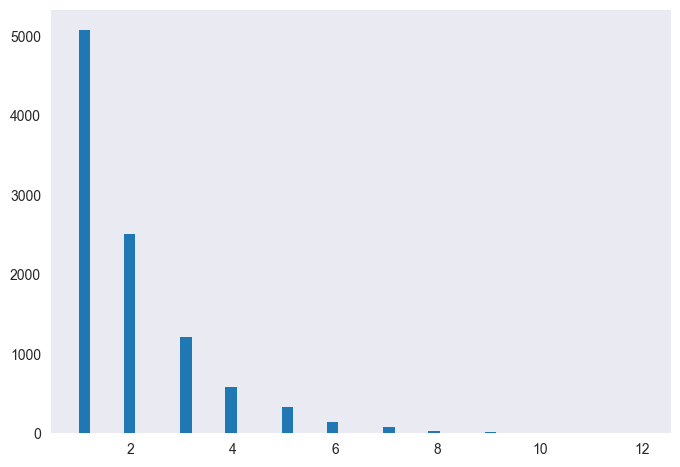

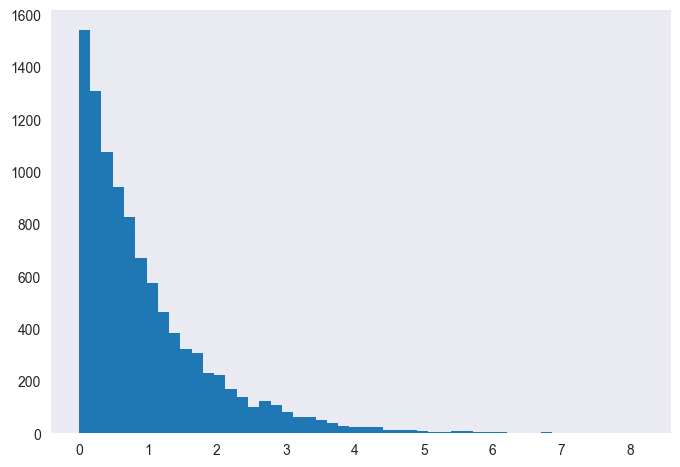

In [137]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()